In [1]:
import os
import pandas as pd

In [5]:
dat=pd.read_csv("dm.csv")
dat.columns
dat.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [8]:
X=dat.drop(["Cust_Id","AmountSpent"],axis=1)
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [11]:
X=pd.get_dummies(X)
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [12]:
y=dat["AmountSpent"]
y.head()

0     755
1    1318
2     296
3    2436
4    1304
Name: AmountSpent, dtype: int64

In [13]:
import sklearn.model_selection as ms
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.2,random_state=200)

In [14]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [15]:
reg.score(X_test,y_test)###MSE of this model

0.5915701153457273

In [16]:
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422])

In [17]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

In [26]:
import pydotplus
os.environ["PATH"] +=os.pathsep + 'C:\\Users\\adity\\Anaconda3\\Library\\bin\\graphviz'

In [27]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

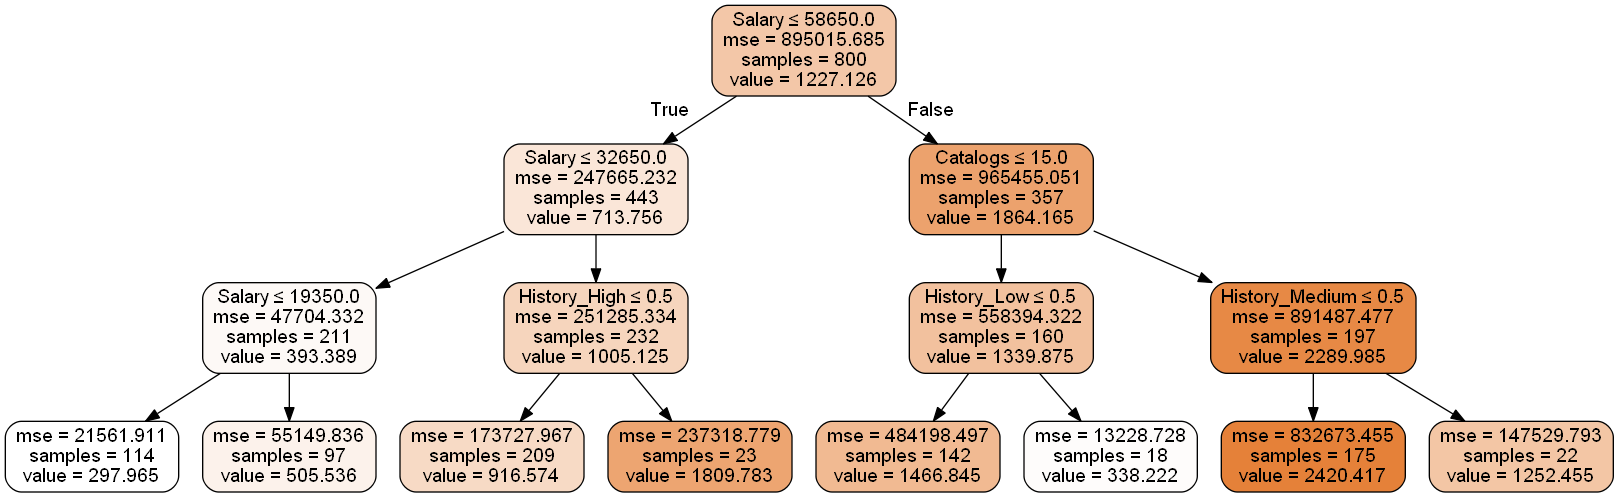

In [28]:
from IPython.display import Image
Image(graph.create_png())

In [29]:
#####Another Example of Decision Tree

In [30]:
dat1=pd.read_csv("REG_TREE.csv",header=0,sep=',',encoding="latin")

In [31]:
dat1.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory', 'number_accounts_past_due',
       'total_past_due_amount', 'bankruptcy_flag', 'foreclosure_flag',
       'total_amount_3rd_party_collections',
       'number_3rd_party_collection_accts', 'vantage_score_3',
       'product_category', 'pim_score', 'consumer_age', 'high_credit', 'terms',
       'monthly_payment', 'ecoa', 'hpi_11', 'UER_1210_PER', 'GDP_2011',
       'UER_SW_122010', 'Expected_Credit'],
      dtype='object')

In [32]:
y=dat1["Expected_Credit"]

In [33]:
X=dat1.drop(["Expected_Credit"],axis=1)

In [34]:
X.head()

,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,...,pim_score,consumer_age,high_credit,terms,monthly_payment,ecoa,hpi_11,UER_1210_PER,GDP_2011,UER_SW_122010
0,0,17,0,7,5,1,5,0,0,0,...,16,1,3500,0,70,1,357.74,7.5,61769,7.8
1,0,17,0,7,5,1,5,0,0,0,...,16,1,2000,0,40,1,357.74,7.5,61769,7.8
2,0,17,0,7,5,1,5,0,0,0,...,16,1,3250,85,50,1,357.74,7.5,61769,7.8
3,0,18,0,8,5,1,5,0,0,0,...,16,1,3500,0,70,1,357.74,7.5,61769,7.8
4,0,18,0,8,5,1,5,0,0,0,...,16,1,2000,0,40,1,357.74,7.5,61769,7.8


In [35]:
y.head()

0    4480
1    4480
2    4480
3    4480
4    4480
Name: Expected_Credit, dtype: int64

In [36]:
import sklearn.model_selection as ms
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.2,random_state=200)

In [37]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=4)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
reg.score(X_test,y_test)###MSE of this model

0.9894047840019461

In [39]:
reg.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(11)

pim_score                                  1.0
UER_SW_122010                              0.0
foreclosure_flag                           0.0
age_oldest_account                         0.0
age_oldest_mortgage_account                0.0
age_newest_account                         0.0
number_of_accounts                         0.0
number_accounts_opened_within_12_months    0.0
number_accounts_always_satisfactory        0.0
number_accounts_major_derogatory           0.0
number_accounts_past_due                   0.0
dtype: float64

In [41]:
import pydotplus
os.environ["PATH"] +=os.pathsep + 'C:\\Users\\adity\\Anaconda3\\Library\\bin\\graphviz'

In [42]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

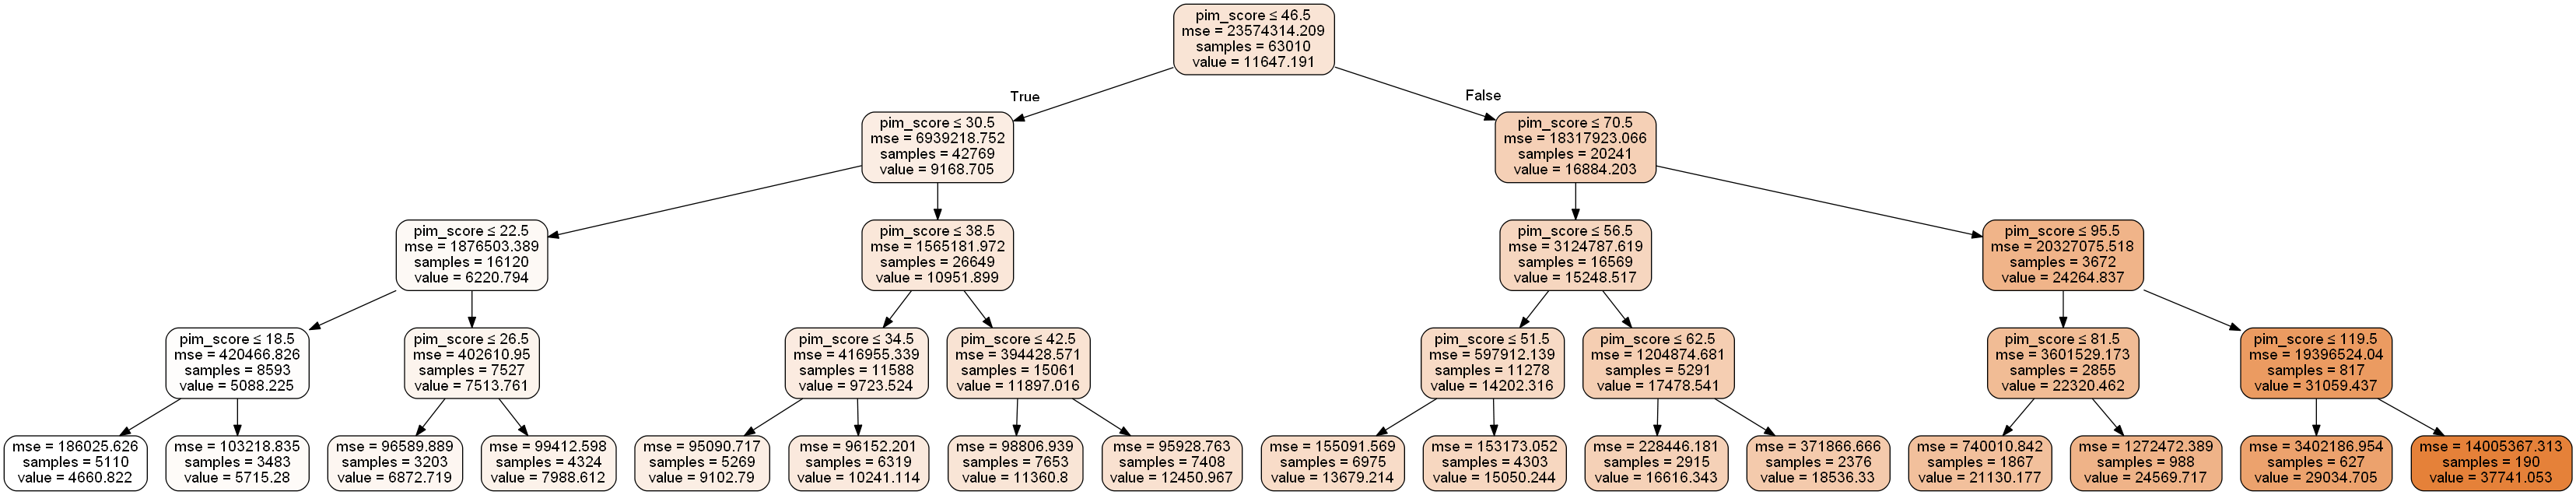

In [43]:
from IPython.display import Image
Image(graph.create_png())